In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from qutip import *
import time
from mpl_toolkits.mplot3d import Axes3D

In [41]:
def compute(N, wc, we, glist):

    # Pre-compute operators for the hamiltonian
    a  = destroy(N)
    at = a.dag()
    b = destroy(N)
    bt = b.dag()
    nc = at * a
    ne = bt * b
         
    A = 0.5
    B = 0.9
    
    idx = 0
    nc_expt = np.zeros(shape(glist))
    ne_expt = np.zeros(shape(glist))
    
    for g in glist:

        # recalculate the hamiltonian for each value of g
        H = wc * nc + we * ne + g * (at * b + bt * a) + A * (bt * bt * b * b) - B * (bt * bt * b * a + at * bt * b * b)
        H = Qobj(H)
        # find the groundstate of the composite system
        evals, ekets = H.eigenstates()
        psi_gnd = ekets[0]
        nc_expt[idx] = expect(nc, psi_gnd)
        ne_expt[idx] = expect(ne, psi_gnd)

        idx += 1

    return nc_expt, ne_expt, ket2dm(psi_gnd)

In [46]:
#
# set up the calculation
#
wc = 1.0 * 2 * np.pi   # cavity frequency
we = 1.0 * 2 * np.pi   # exciton frequency
N = 20              # number of cavity fock states

glist = np.linspace(-50, 50, 500) * 2 * np.pi # coupling strength vector

start_time = time.time()
nc, ne, rhoss_final = compute(N, wc, we, glist)
print('time elapsed = ' + str(time.time() - start_time)) 

time elapsed = 5.038956165313721


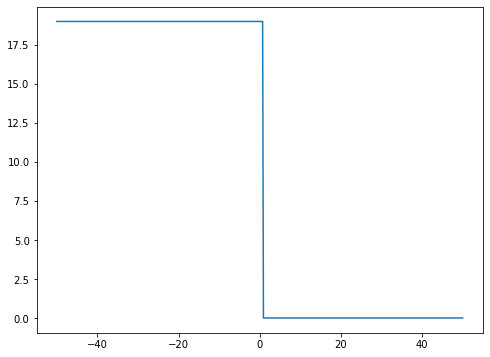

In [47]:
#
# plot the cavity and atom occupation numbers as a function of 
#
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(glist/(2*np.pi), nc)